# _repo Importance of the missing genes in the inferred GRNs
Following the approach used in [https://www.kaggle.com/code/alexandervc/op2-eda-housekeeping-genes?scriptVersionId=155511517&cellId=11], we present a visual comparison of the significance of data that needs to go versus remaining ones. We distinguish housekeeping genes versus other genes for better comparision.

In [ ]:
# load missing genes
missing_genes_co_de = np.loadtxt(f'{work_dir}/missing_genes/celloracle.txt', dtype=str)
missing_genes_scenic_de = np.loadtxt(f'{work_dir}/missing_genes/scenicplus.txt', dtype=str)
# define filters
missing_genes_scenic_filter = np.isin(gene_names_de, missing_genes_scenic_de)
missing_genes_co_filter = np.isin(gene_names_de, missing_genes_co_de)

In [ ]:
d = pd.DataFrame(); IX = -1
list_thresholds = [1e-2,1e-3,1e-4,1e-5,1e-6,1e-7,1e-8,1e-9,1e-10,1e-11,1e-12,1e-13,1e-14,1e-15,1e-16]

def calculate_percentage(t, df, filter=False):
    # number of values in DE that passes the given threshold on p value
    if filter:
        v  = df[filter_mask_de].values.ravel()
    else:
        v  = df.values.ravel()
    v = v[~np.isnan(v)]
    v = 10**(-np.abs(v))
    m = v < t
    return 100*m.sum()

for t in list_thresholds:
    IX+=1
    d.loc[IX, 'Threshold'] = t
    # data_df
    baseline_n = calculate_percentage(t, data_df, True)
    
    # basics 
    # df = data_df.loc[:, ~housekeeping_genes_filter]
    # rr = calculate_percentage(t, df, True)
    # d.loc[IX, 'All genes'] = rr/baseline_n

    # df = data_df.loc[:, housekeeping_genes_filter]
    # rr = calculate_percentage(t, df, True)
    # d.loc[IX, 'House keeping genes'] = rr/baseline_n

    # CO
    df = data_df.loc[:, missing_genes_co_de]
    rr = calculate_percentage(t, df, True)
    d.loc[IX, 'Missing genes in CellOracle'] = rr/baseline_n
    # scenic+
    df = data_df.loc[:, missing_genes_scenic_de]
    rr = calculate_percentage(t, df, True)
    d.loc[IX, 'Missing genes in Scenic+'] = rr/baseline_n

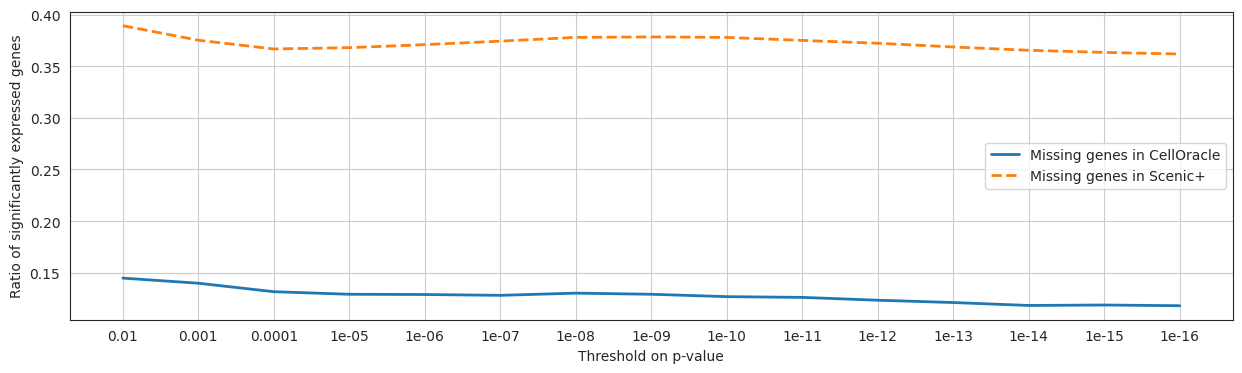

In [ ]:
# Define line styles and line width
line_styles = ['-', '--', '-.', ':'] * 2
line_width = 2  # Increase the line thickness
plt.figure(figsize=(15, 4))
# Iterate over columns and line styles
for col, style in zip(d.columns[1:], line_styles * (len(d.columns) // len(line_styles) + 1)):
    plt.plot(d[col].values, label=col, linestyle=style, linewidth=line_width)
plt.grid()
plt.legend()
plt.xticks(range(len(list_thresholds)), list_thresholds)
plt.xlabel('Threshold on p-value')
plt.ylabel('Ratio of significantly expressed genes')
plt.savefig('sig.png', bbox_inches='tight')
plt.show()

In [ ]:
d = pd.DataFrame(); IX = -1
list_thresholds = [1e-2,1e-3,1e-4,1e-5,1e-6,1e-7,1e-8,1e-9,1e-10,1e-11,1e-12,1e-13,1e-14,1e-15,1e-16]


def calculate_percentage(t, df, filter=False):
    if filter:
        v  = df[filter_mask_de].values.ravel()
    else:
        v  = df.values.ravel()
    v = v[~np.isnan(v)]
    v = 10**(-np.abs(v))
    m = v < t
    if len(v)==0:
        raise ValueError('shouldnt be')
    return 100*m.sum()/len(v)
for t in list_thresholds:
    IX+=1
    d.loc[IX, 'Threshold'] = t
    # basics 
    df = data_df.loc[:, ~housekeeping_genes_filter]
    rr = calculate_percentage(t, df, True)
    d.loc[IX, 'Other genes'] = rr

    df = data_df.loc[:, housekeeping_genes_filter]
    rr = calculate_percentage(t, df, True)
    d.loc[IX, 'House keeping genes'] = rr

    # CO
    df = data_df.loc[:, missing_genes_co_de]
    rr = calculate_percentage(t, df, True)
    d.loc[IX, 'Missing genes in CellOracle'] = rr
    # scenic+
    df = data_df.loc[:, missing_genes_scenic_de]
    rr = calculate_percentage(t, df, True)
    d.loc[IX, 'Missing genes in Scenic+'] = rr

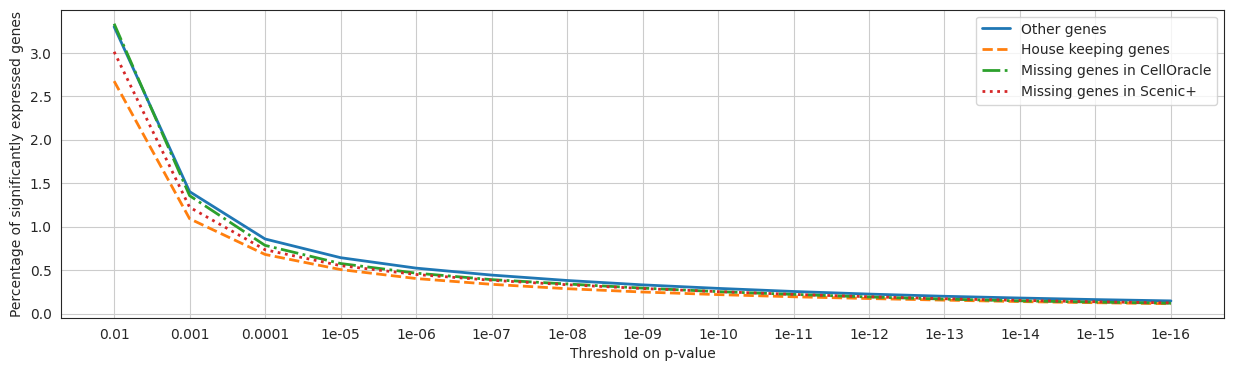

In [ ]:
# Define line styles and line width
line_styles = ['-', '--', '-.', ':'] * 2
line_width = 2  # Increase the line thickness
plt.figure(figsize=(15, 4))
# Iterate over columns and line styles
for col, style in zip(d.columns[1:], line_styles * (len(d.columns) // len(line_styles) + 1)):
    plt.plot(d[col].values, label=col, linestyle=style, linewidth=line_width)
plt.grid()
plt.legend()
plt.xticks(range(len(list_thresholds)), list_thresholds)
plt.xlabel('Threshold on p-value')
plt.ylabel('Percentage of significantly expressed genes')
plt.savefig('sig.png', bbox_inches='tight')
plt.show()